# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2024
## Домашнее задание 1. Cвойства и сравнение оценок
### Мягкий дедлайн --- 6 октября 23:59
### Жёсткий дедлайн --- 12 октября 16:59

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о способе сдачи домашнего задания будет позже.

---

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения, моделирование оценок параметров и проверку их теоретических свойств на практике. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

In [101]:
# Matplotlib needed to correctly display suptitles,
# as well as some other minor things.
# I thought I might as well ensure everything is up to date
%pip install --upgrade matplotlib numpy scipy statsmodels

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.1.2-cp311-cp311-win_amd64.whl.metadata (59 kB)
Note: you may need to restart the kernel to use updated packages.


In [102]:
from __future__ import annotations
import typing
import abc
import dataclasses
import itertools

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

**Зафиксируем** `seed` для воспроизводимости.

In [104]:
np.random.seed(42)

**Условие задания**: Аспект-Император трёх морей Анасуримбор Келлхус спустя 20 лет с момента объединения Новой Империи объявляет начало Великой Ордалии --- похода против крепости Голготтерат. Поход займёт более, чем пол года путешествия сквозь безжизненные населённые дикими монстрами пустоши, в связи с чем Келлхус отдаёт приказ всем провинциям выдать провизию для похода, а имперским математикам, коим принадлежите Вы --- сосчитать, каждый ли правитель провинции выполнил приказ качественно.

В этой практике Вам придётся оценить число материальных ресурсов, предоставленных каждой из тысячи провинций, лучшим образом и предоставить отчёт, чему равно мат. ожидание числа ресурсов и почему Ваш способ оценивания хорош. Будем надеяться, что в среднем все короли добросовестно выполнили приказ.

**Гайд, как моделировать оценки**:

В разных задачах Вы будете видеть ключевое слово "смоделируйте". Для моделирования оценки необходимо сгенерировать большое число выборок из одного распределения, построить по каждой из выборок оценку и получить выборку оценок. Далее по выборке оценок можно построить гистограмму или эмпирическую функцию распределения, и сделать выводы о распределении оценок.

Как мы знаем по теореме Гливенко-Кантелли, эмпирическая функция распределения сходится к реальной, и, при некоторых условиях, гистограмма сходится к плотности, если она существует.

### Задача 1

Известно, что количество урожая каждой Нансурской провинции в год подчиняется распределению $U[0, 2]$ в тоннах. Некоторые короли решают оставить существенную часть урожая, мимикрируя под $U[0, \theta]$ для $\theta < 2$. Нужно предложить метод оценки $\theta$. Если значение оценки будет меньше 2, приказ будет считаться невыполненным.

Ставится задача изучить способы оценивания параметра $\theta$ семейства распределений $U[0, \theta]$. В данной задаче Вы численно смоделируете оценки параметра $\theta$ и сделаете вывод о том, какую оценку стоит применить на практике.

Сгенерируйте $N$ выборок $X_1, \dots, X_N$ размера $N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$ и $\theta = 2$.

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import uniform, probplot
import seaborn as sns

In [106]:
loc = 0    
theta = 2  

N = 1e4
N = int(N)

samples = uniform.rvs(loc=loc, scale=theta, size=(N, N))

Для всех $N$ выборок посчитайте оценки параметра $\theta$: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

In [107]:
X_mean = np.mean(samples, axis=1)
X_min = np.min(samples, axis=1)
X_max = np.max(samples, axis=1)

theta_estimation_1 = 2 * X_mean 
theta_estimation_2 = X_mean + X_max / 2  
theta_estimation_3 = (N + 1) * X_min  
theta_estimation_4 = X_min + X_max  
theta_estimation_5 = (N + 1) / N * X_max 

При помощи моделирования выясните, какие оценки точнее, чем другие.

Для этого прикиньте распределение каждой из оценок. Какая оценка предпочтительнее? Почему?

C:\Users\natas\AppData\Local\Temp\ipykernel_9336\2110288971.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(theta_estimation, ax=axes[i], shade=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\natas\AppData\Local\Temp\ipykernel_9336\2110288971.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(theta_estimation, ax=axes[i], shade=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf valu

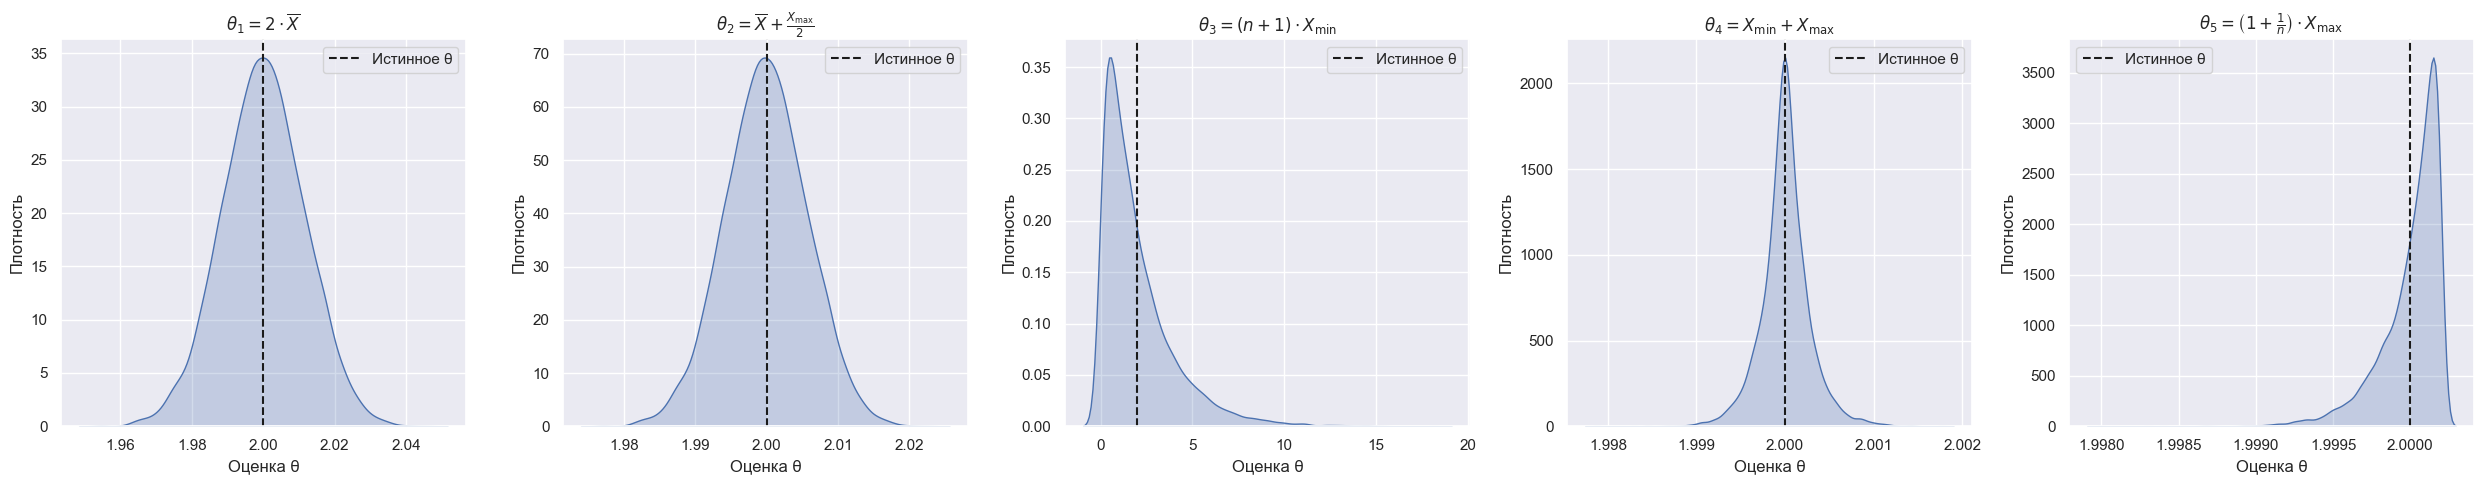

In [133]:
theta_estimators = [
    (lambda X, n: 2 * np.mean(X, axis=1), '$\\theta_1 = 2 \\cdot \\overline{X}$'),
    (lambda X, n: np.mean(X, axis=1) + np.max(X, axis=1) / 2, '$\\theta_2 = \\overline{X} + \\frac{X_{\\max}}{2}$'),
    (lambda X, n: (n + 1) * np.min(X, axis=1), '$\\theta_3 = (n + 1) \\cdot X_{\\min}$'),
    (lambda X, n: np.min(X, axis=1) + np.max(X, axis=1), '$\\theta_4 = X_{\\min} + X_{\\max}$'),
    (lambda X, n: ((n + 1) / n) * np.max(X, axis=1), '$\\theta_5 = \\left(1 + \\frac{1}{n}\\right) \\cdot X_{\\max}$')
]
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))

for i, (estimator_func, label) in enumerate(theta_estimators):
    theta_estimation = estimator_func(samples, N)
    sns.kdeplot(theta_estimation, ax=axes[i], shade=True)
    axes[i].set_title(label)
    axes[i].set_xlabel('Оценка θ')
    axes[i].set_ylabel('Плотность')
    axes[i].axvline(x=2, color='k', linestyle='--', label='Истинное θ')
    axes[i].legend()
    
plt.tight_layout()
plt.show()

Вывод: я изобразила 5 графиков рядом друг с другом, пунктирной линией изображено значение тета = 2. логика такова - чем ближе к пунктирной линии, тем лучше (KDE показывает распределение оценок параметра тета, чем больше оценок тета находятся около 2, тем лучше). На этом этапе кажется, что 4 оценка выглядит лучше остальных, по третьей оценке точно видно, что она выглядит хуже всех.  Но все оценки по-своему приближают параметр, какие-то лучше, какие-то хуже.

Как меняется распределение каждой оценки с ростом параметра? Постройте оценки не только по выборкам, но и по их префиксам. В качестве размера префикса возьмите хотя бы 4 значения, меньших N.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

Изучите оценки на состоятельность и нормальность. Сравните скорости сходимости.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

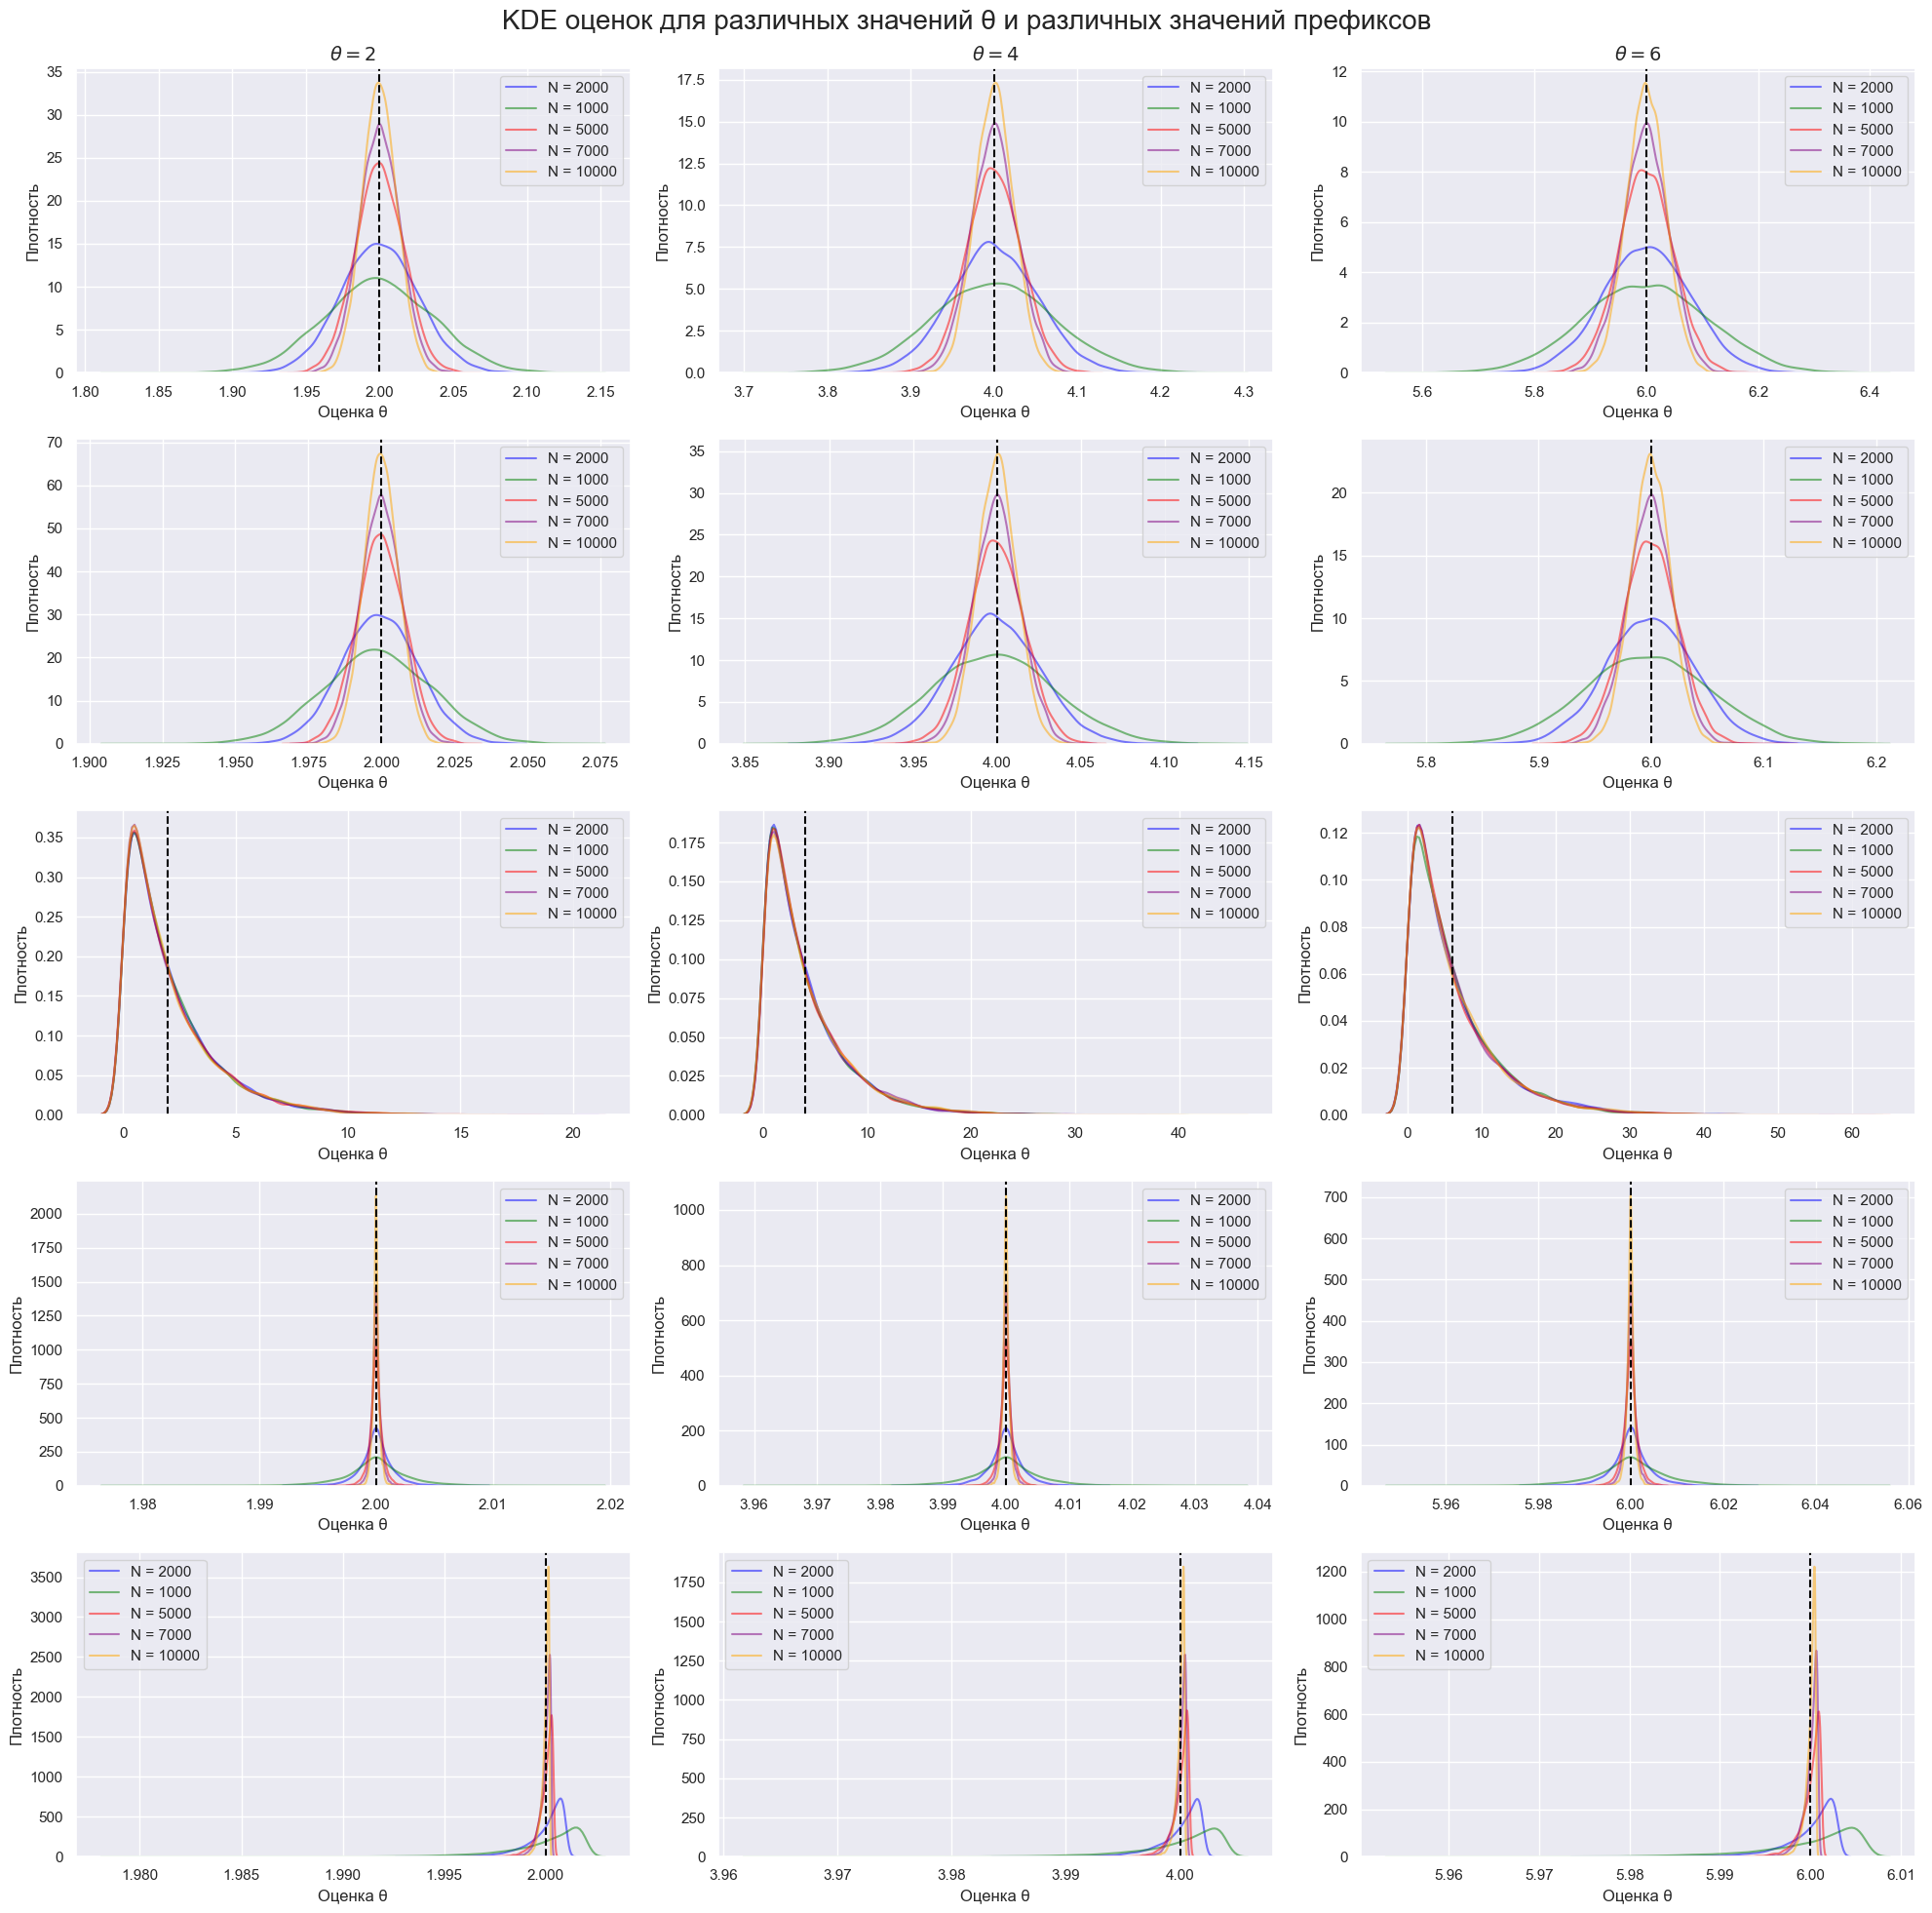

In [109]:
theta_values = [2, 4, 6]  
prefix_sizes = [2000, 1000, 5000, 7000, 10000]  

N_colors = {2000: 'blue', 1000: 'green', 5000: 'red', 7000: 'purple', 10000: 'orange'}

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
fig.suptitle('KDE оценок для различных значений θ и различных значений префиксов', fontsize=20)

theta_estimators = [
    (lambda X, n: 2 * np.mean(X, axis=1), '$\\theta_1 = 2 \\cdot \\overline{X}$'),
    (lambda X, n: np.mean(X, axis=1) + np.max(X, axis=1) / 2, '$\\theta_2 = \\overline{X} + \\frac{X_{\\max}}{2}$'),
    (lambda X, n: (n + 1) * np.min(X, axis=1), '$\\theta_3 = (n + 1) \\cdot X_{\\min}$'),
    (lambda X, n: np.min(X, axis=1) + np.max(X, axis=1), '$\\theta_4 = X_{\\min} + X_{\\max}$'),
    (lambda X, n: ((n + 1) / n) * np.max(X, axis=1), '$\\theta_5 = \\left(1 + \\frac{1}{n}\\right) \\cdot X_{\\max}$')
]

for col, theta_true in enumerate(theta_values):
    samples = uniform.rvs(loc=0, scale=theta_true, size=(N, N))
    
    for row, (estimator_func, label) in enumerate(theta_estimators):
        ax = axes[row, col]
        for n in prefix_sizes:
            sample_prefix = samples[:, :n]
            theta_estimation = estimator_func(sample_prefix, n)
            sns.kdeplot(theta_estimation, ax=ax, color=N_colors[n], label=f'N = {n}', alpha=0.5)
        
        ax.axvline(x=theta_true, color='black', linestyle='--')
        
        if row == 0:
            ax.set_title(f'$\\theta = {theta_true}$', fontsize=14)
        if col == 0:
            ax.set_ylabel(label, fontsize=12)
        ax.set_xlabel('Оценка θ')
        ax.set_ylabel('Плотность')

        ax.grid(True)
        
        ax.legend()

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


Я рассмотрела 4 значения префиксов - 1000, 2000, 5000 и 7000. И значения $\theta$ = 2, 4, 6. Можно заметить, что с ростом префикса распределение становится ближе к заданному значению $\theta$. По графикам также видно, что 4 оценка лучше остальных.  

Проверка на состоятельность и нормальность.

Возьму N=10^4, $\theta$=2,число линий я задам равным 100, этого достаточно, чтобы увидеть сходимость (или ее отсутствие). Синей пунктирной линией отмечено значение заданного $\theta$. На всех графиках, кроме $\theta_3$ видна сходимость, на 3 графике ее нет, это логично, потому что третья оценка не является состоятельной, это можно доказать теоретически.

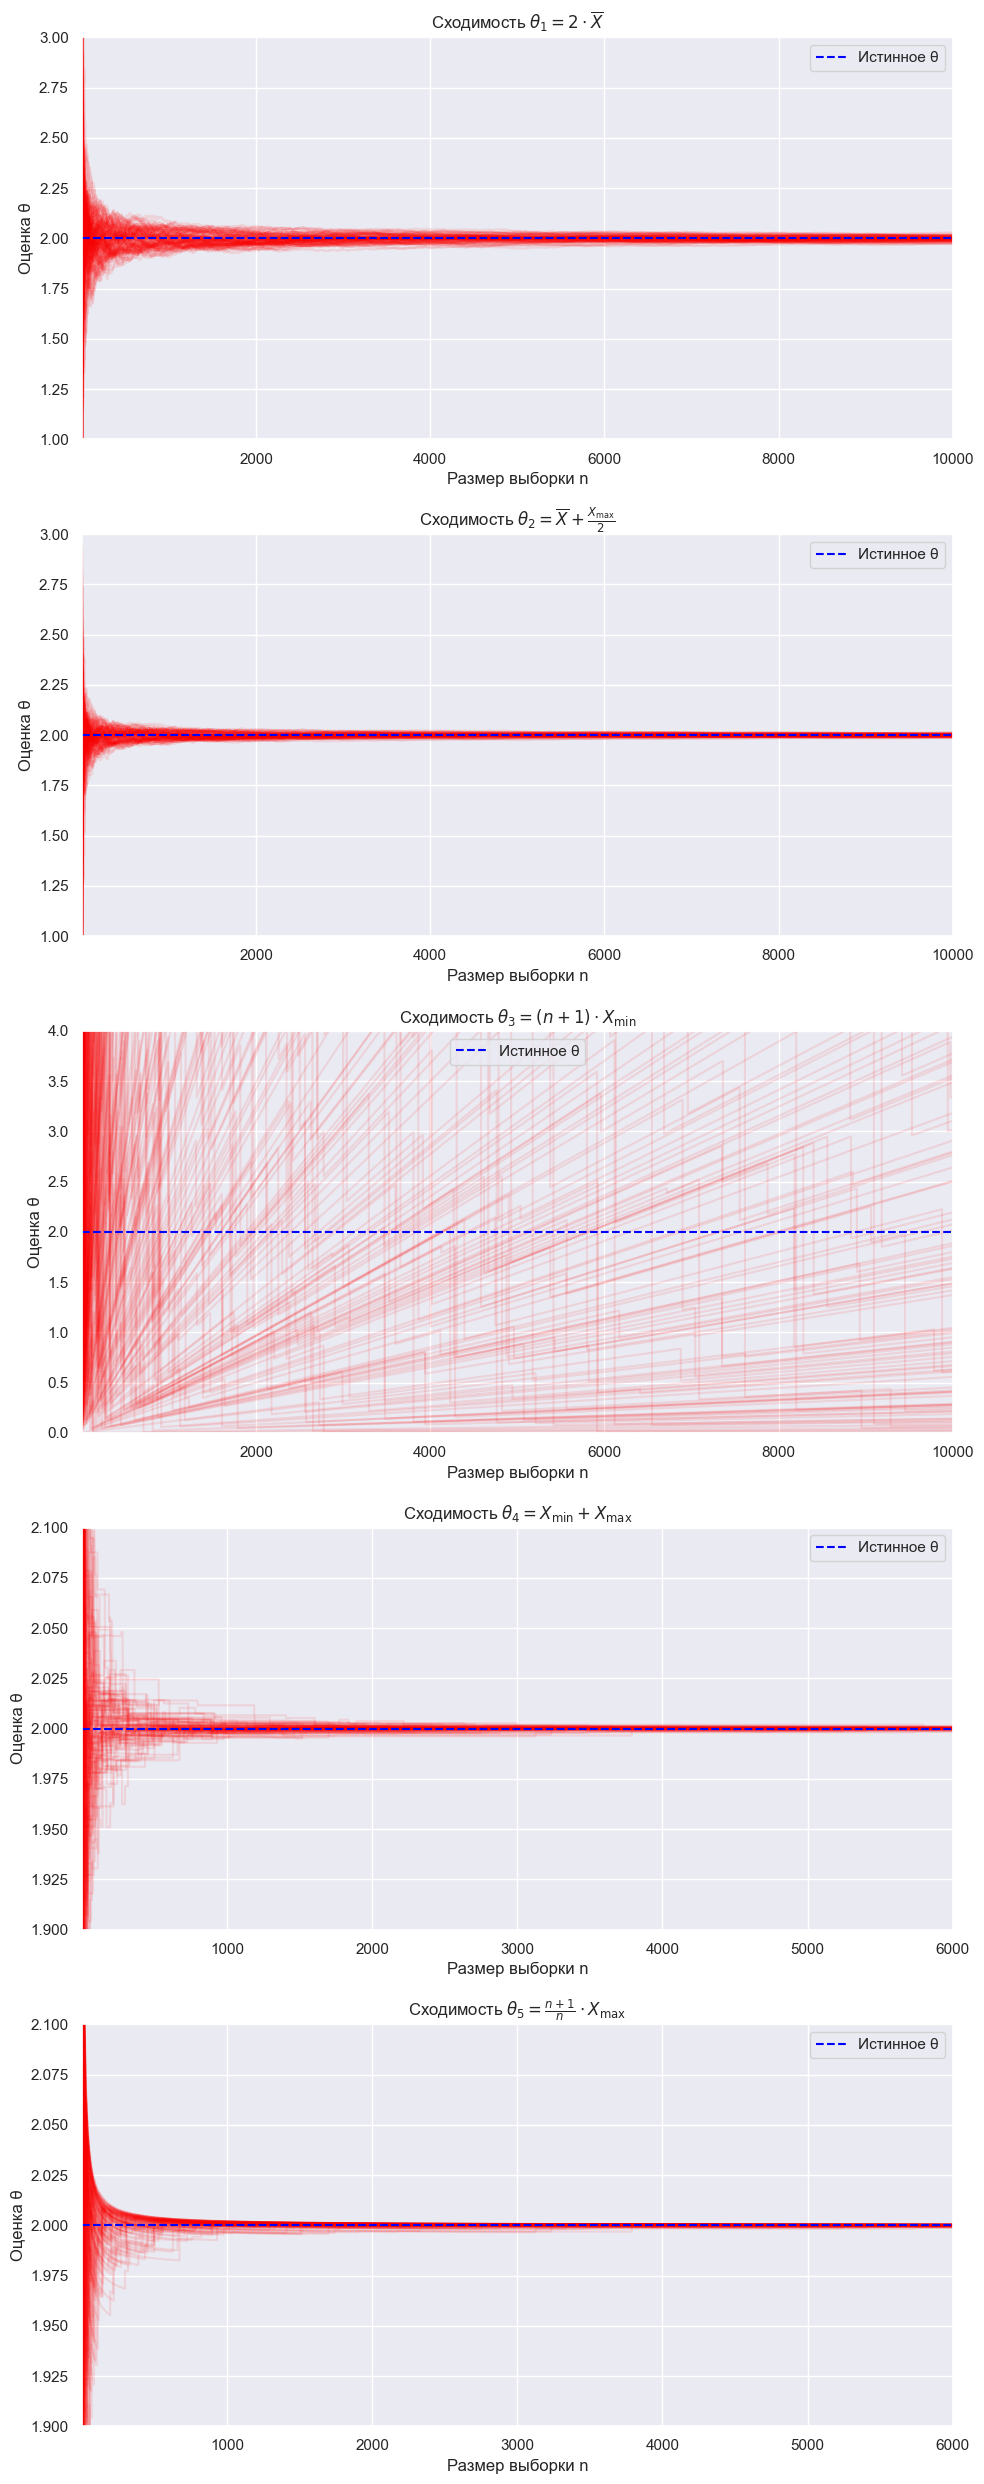

In [110]:
theta = 2 
N = 10000    
M = 100        

samples = uniform.rvs(loc=0, scale=theta, size=(M, N))

n_array = np.arange(1, N + 1)

cumsum_samples = np.cumsum(samples, axis=1)
cummax_samples = np.maximum.accumulate(samples, axis=1)
cummin_samples = np.minimum.accumulate(samples, axis=1)

theta_estimators = [
    (lambda X_mean, X_min, X_max, n: 2 * X_mean, '$\\theta_1 = 2 \\cdot \\overline{X}$'),
    (lambda X_mean, X_min, X_max, n: X_mean + X_max / 2, '$\\theta_2 = \\overline{X} + \\frac{X_{\\max}}{2}$'),
    (lambda X_mean, X_min, X_max, n: (n + 1) * X_min, '$\\theta_3 = (n + 1) \\cdot X_{\\min}$'),
    (lambda X_mean, X_min, X_max, n: X_min + X_max, '$\\theta_4 = X_{\\min} + X_{\\max}$'),
    (lambda X_mean, X_min, X_max, n: ((n + 1) / n) * X_max, '$\\theta_5 = \\frac{n + 1}{n} \\cdot X_{\\max}$')
]

axis_limits = {
    (0, 0): {'xlim': (1, N), 'ylim': (1, 3)},
    (1, 0): {'xlim': (1, N), 'ylim': (1, 3)},
    (2, 0): {'xlim': (1, N), 'ylim': (0, 4)},
    (3, 0): {'xlim': (1, 6000), 'ylim': (1.9, 2.1)},
    (4, 0): {'xlim': (1, 6000), 'ylim': (1.9, 2.1)}
}

n_values = n_array.reshape(1, N) 
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 25))

X_mean = cumsum_samples / n_values
X_min = cummin_samples
X_max = cummax_samples

for idx, (estimator_func, label) in enumerate(theta_estimators):
    ax = axes[idx]
    theta_estimation = estimator_func(X_mean, X_min, X_max, n_array)
    for i in range(M):
        ax.plot(n_array, theta_estimation[i], color='red', alpha=0.1)
    ax.axhline(y=theta, color='blue', linestyle='--', label='Истинное θ')

    ax.set_xlabel('Размер выборки n')
    ax.set_ylabel('Оценка θ')
    ax.set_title(f'Сходимость {label}')
    ax.legend()
    row, col = idx, 0
    if (row, col) in axis_limits:
        limits = axis_limits[(row, col)]
        ax.set_xlim(limits['xlim'])
        ax.set_ylim(limits['ylim'])

plt.tight_layout()
plt.show()




C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

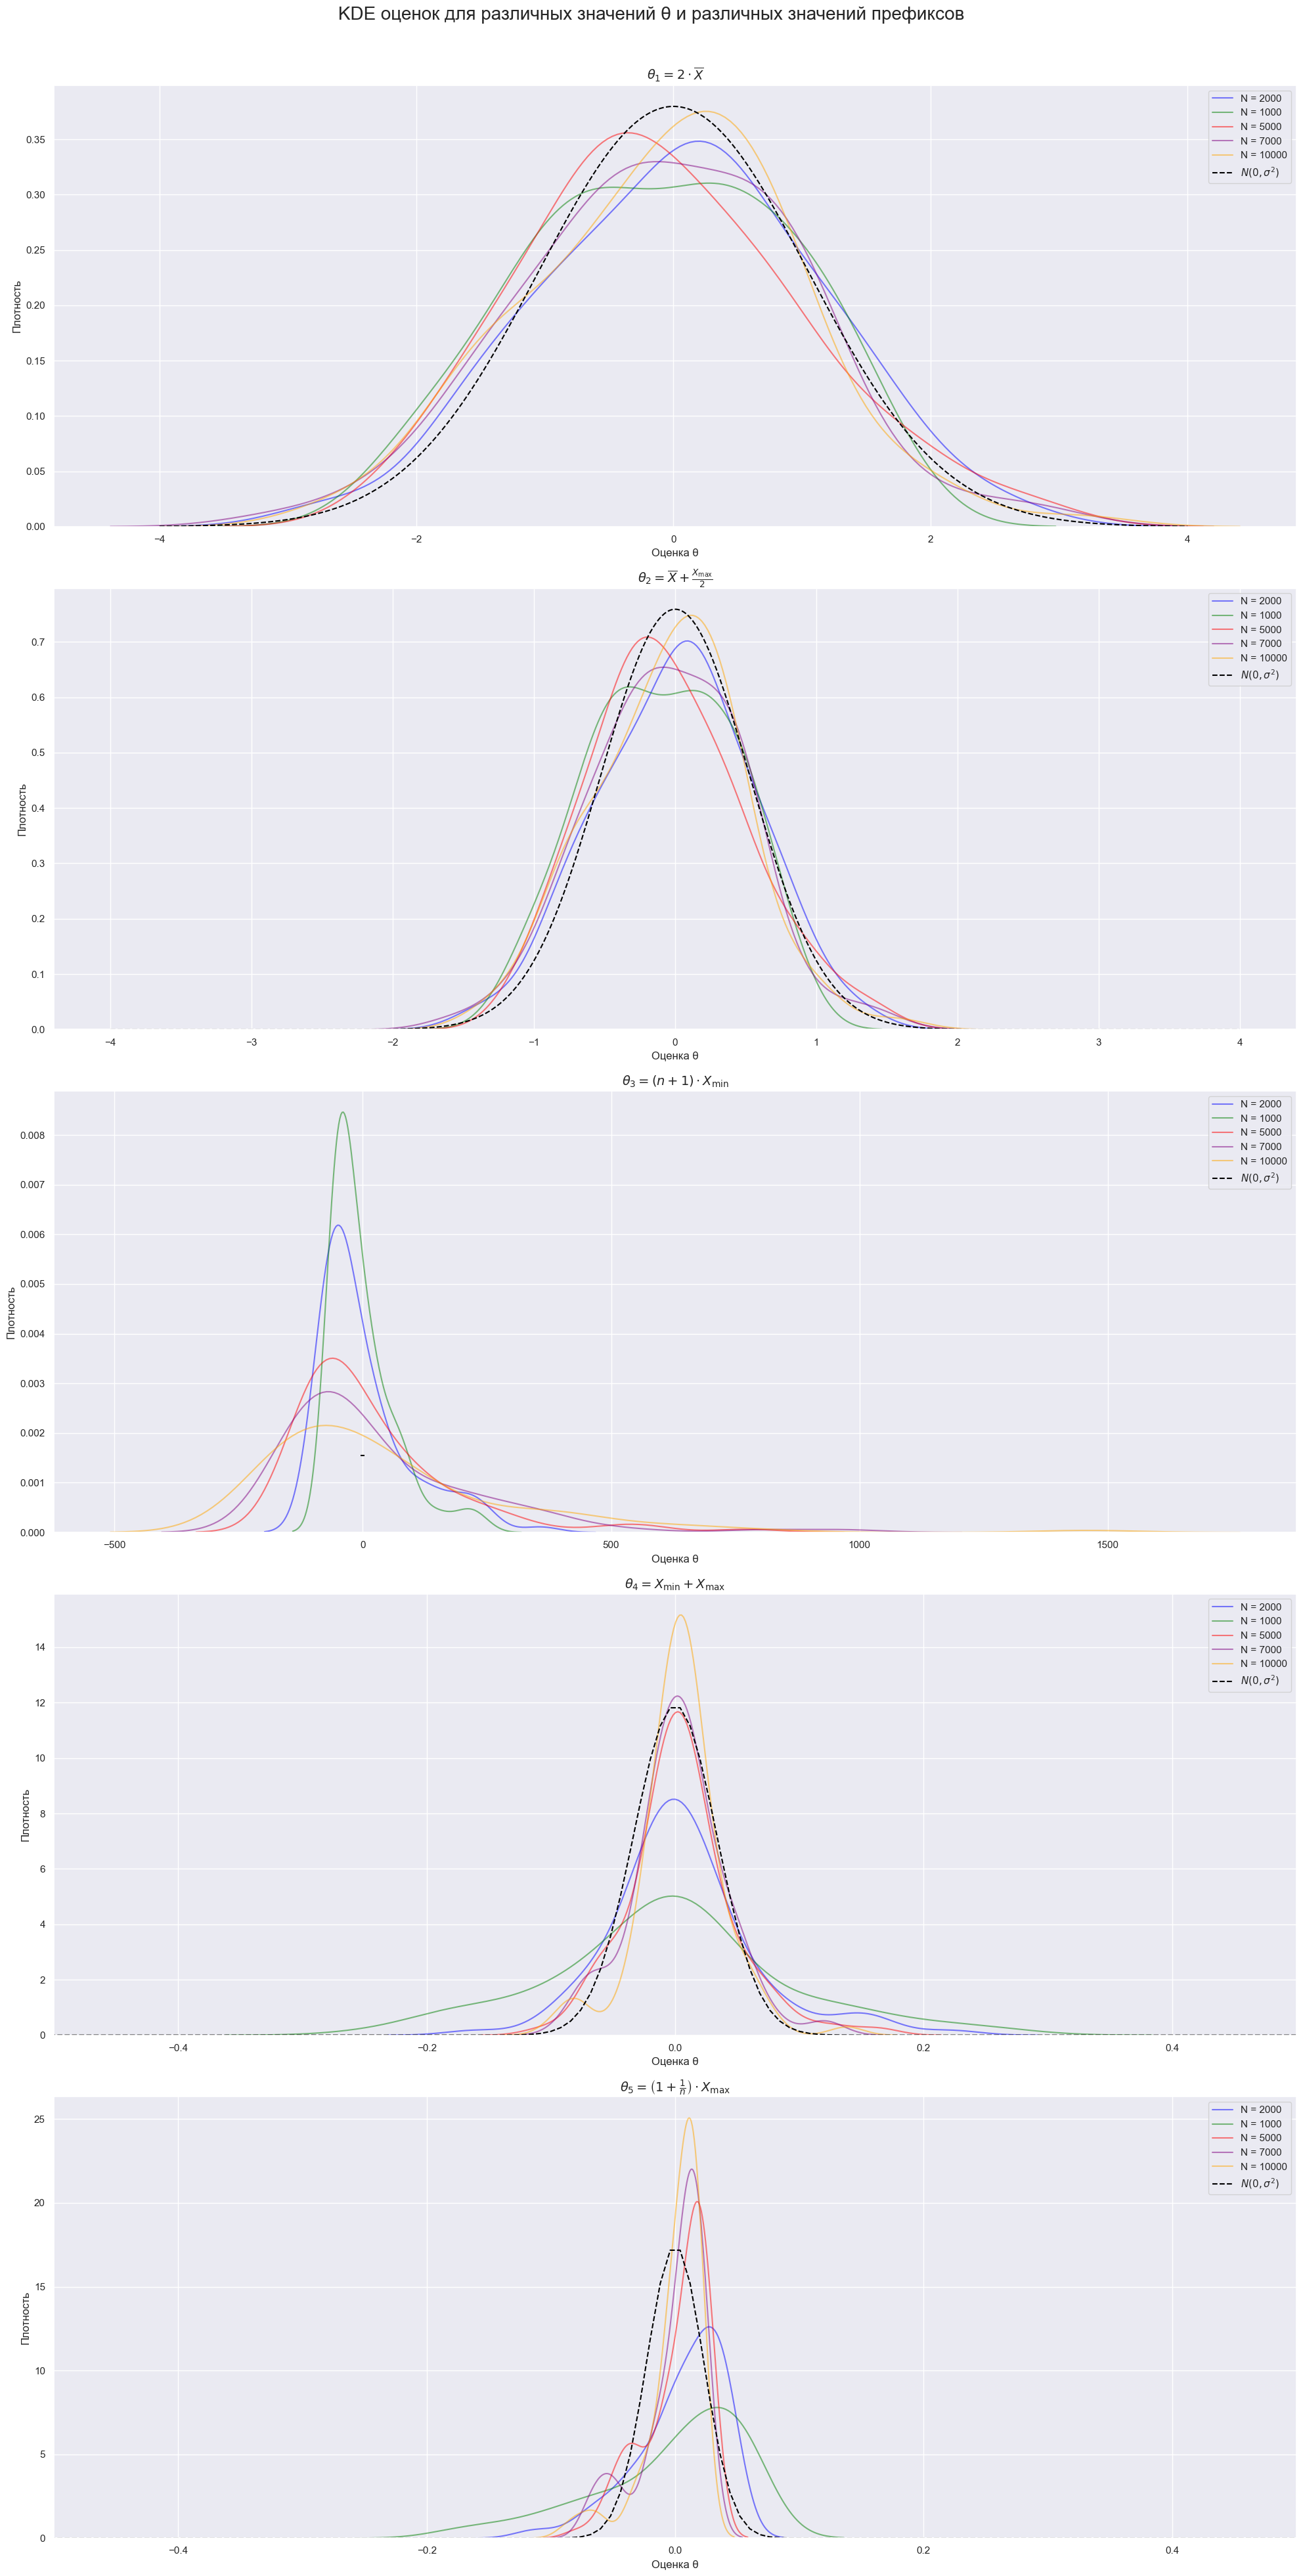

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
from scipy.stats import uniform

theta_values = [2]
N = 10000  
M = 100  

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20, 40))
fig.suptitle('KDE оценок для различных значений θ и различных значений префиксов', fontsize=20)

theta_estimators = [
    (lambda X, n: 2 * np.mean(X, axis=1), '$\\theta_1 = 2 \\cdot \\overline{X}$'),
    (lambda X, n: np.mean(X, axis=1) + np.max(X, axis=1) / 2, '$\\theta_2 = \\overline{X} + \\frac{X_{\\max}}{2}$'),
    (lambda X, n: (n + 1) * np.min(X, axis=1), '$\\theta_3 = (n + 1) \\cdot X_{\\min}$'),
    (lambda X, n: np.min(X, axis=1) + np.max(X, axis=1), '$\\theta_4 = X_{\\min} + X_{\\max}$'),
    (lambda X, n: ((n + 1) / n) * np.max(X, axis=1), '$\\theta_5 = \\left(1 + \\frac{1}{n}\\right) \\cdot X_{\\max}$')
]

for col, theta_true in enumerate(theta_values):

    samples = uniform.rvs(loc=0, scale=theta_true, size=(M, N))
    
    for row, (estimator_func, label) in enumerate(theta_estimators):
        ax = axes[row]
        
        for n in prefix_sizes:
            sample_prefix = samples[:, :n] 
            theta_estimation = estimator_func(sample_prefix, n)
            
            sns.kdeplot((theta_estimation - theta_true) * np.sqrt(n), ax=ax, color=N_colors[n], label=f'N = {n}', alpha=0.5)
        
        grid = np.linspace(-4, 4, 1000)  
        std = np.std(np.sqrt(10000) * (theta_estimation - theta_true))  
        normal_pdf = sps.norm.pdf(grid, loc=0, scale=std)  

        ax.plot(grid, normal_pdf, color= 'black', linestyle='dashed', label="$N(0, \\sigma^2)$")
        
        ax.set_title(f'{label}', fontsize=14)
        if col == 0:
            ax.set_ylabel(label, fontsize=12)
        if row == 3 or row == 4:
            ax.set_xlim(-0.5, 0.5)
        ax.set_xlabel('Оценка $\theta$')
        ax.set_ylabel('Плотность')
        ax.grid(True)
        ax.legend()

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()



По графикам видно, что 1, 2 и 4 оценка являются асимптотически нормальными, а 3 и 5 оценки нет.  

Какая оценка получилась лучше? Как Вы это поняли? А что говорит теория? Стоит ли в данной ситуации сравнивать оценки для других значений параметра $\theta$?

__Ответ:__ По итогу получились следующие выводы:
1. 1, 2 и 4 оценка являются состоятельными и асимптотически нормальными.
2. 5 оценка является только состоятельной, при этом не является асимптотически нормальныой.
3. 3 оценка не является состоятельной, и не является асимптотически нормальной.

По поводу пункта с префиксами: на графиках 1,2,4 и 5 оценок видно, что с ростом префикса KDE стремится к значению $\theta$. Из графиков также видно, что тот же самый вывод можно сделать, используя только одно значение $\theta$ (поэтому в исследовании на состоятельность и асимптотическую нормальность я использовала только $\theta$=2). 

Теоретически я исследовала на смещенность, состоятельность, асимптотическую нормальность и среднеквадратичный риск. 
Теоретически все оценки, кроме второй, являются несмещенными.  Также теоретически можно убедиться в выводах о состоятельности оценок - все оценки, кроме третьей, являются состоятельными, оценки 1, 2 и 4 являются асимптотически нормальными, а 3 и 5 - нет. 

Также следует рассмотреть задачу исследования на среднеквадратичный риск. Самой лучшей оценкой с точки зрения среднеквадратичного риска является 5 оценка. 







Сделайте вывод.


__Вывод:__ Мне сложно сделать однозначный вывод. Основываясь на KDE хочется сказать, что самыми лучшими оценками является 4 или 5 оценка, и теоретическое исследование на среднеквадратичный риск говорит, что самой лучшей оценкой является оценка 5. При этом меня смущает, что она не является асимптотически нормальной. Если рассматривать только те оценки, которые являются и несмещенными, и состоятельными, и асимптотически нормальными, то надо выбирать между 1, 2 и 4 оценкой. С точки зрения среднеквадратиечского риска, 4 оценка лучше первой и второй, поэтому я оставновлюсь на 4 оценке именно из-за среднеквадратичного риска, и потому что она состоятельная, несмещенная и асимптотически нормальная. 

### Задача 2

Конрийские провинции известны своими пастбищами и скотоводами. Принц Нерсей Пройас замерил, что количество скота подчиняется экспоненциальному распределению с параметром $\lambda = 1$ (в тысячах голов). Для подсчёта оценки параметра есть семейство оценок $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$, каждая следующая из которых требует большего числа операций на вычисление. Стоит ли оно того? Это и нужно выяснить.

В этой задаче Вы научитесь подбирать гиперпараметр к семейству оценок. Как известно из основного курса статистики, для любого $k$ оценка  $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ является состоятельной и асимптотически нормальной. Но какой $k$ стоит выбрать?

Сгенерируйте $N$ выборок $X_1, ..., X_N$ размера $n$ из экспоненциального распределения с параметром $\lambda = 1$ для $N = n = 10^4$.

In [230]:
import numpy as np

N = 10000
n = 10000  
lambda_param = 1  

samples = np.random.exponential(scale=1/lambda_param, size=(N, n))

Для всех выборок посчитайте оценку $\widehat{\lambda}_k=(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ параметра $\lambda$. Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком k оценка ведет себя лучше (рассмотрите не менее $10$ различных значений $k$).

In [231]:
from scipy.special import factorial

In [236]:
lambda_estimators = []
for i in range(1, 11):
        lambda_estimators.append((lambda X, k=i: (factorial(k) / np.mean(X** k, axis=1) ) ** (1 / k), f'k= {i}'))

C:\Users\natas\AppData\Local\Temp\ipykernel_9336\1086083287.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(lambda_estimation, ax=ax, shade=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\natas\AppData\Local\Temp\ipykernel_9336\1086083287.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(lambda_estimation, ax=ax, shade=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to Na

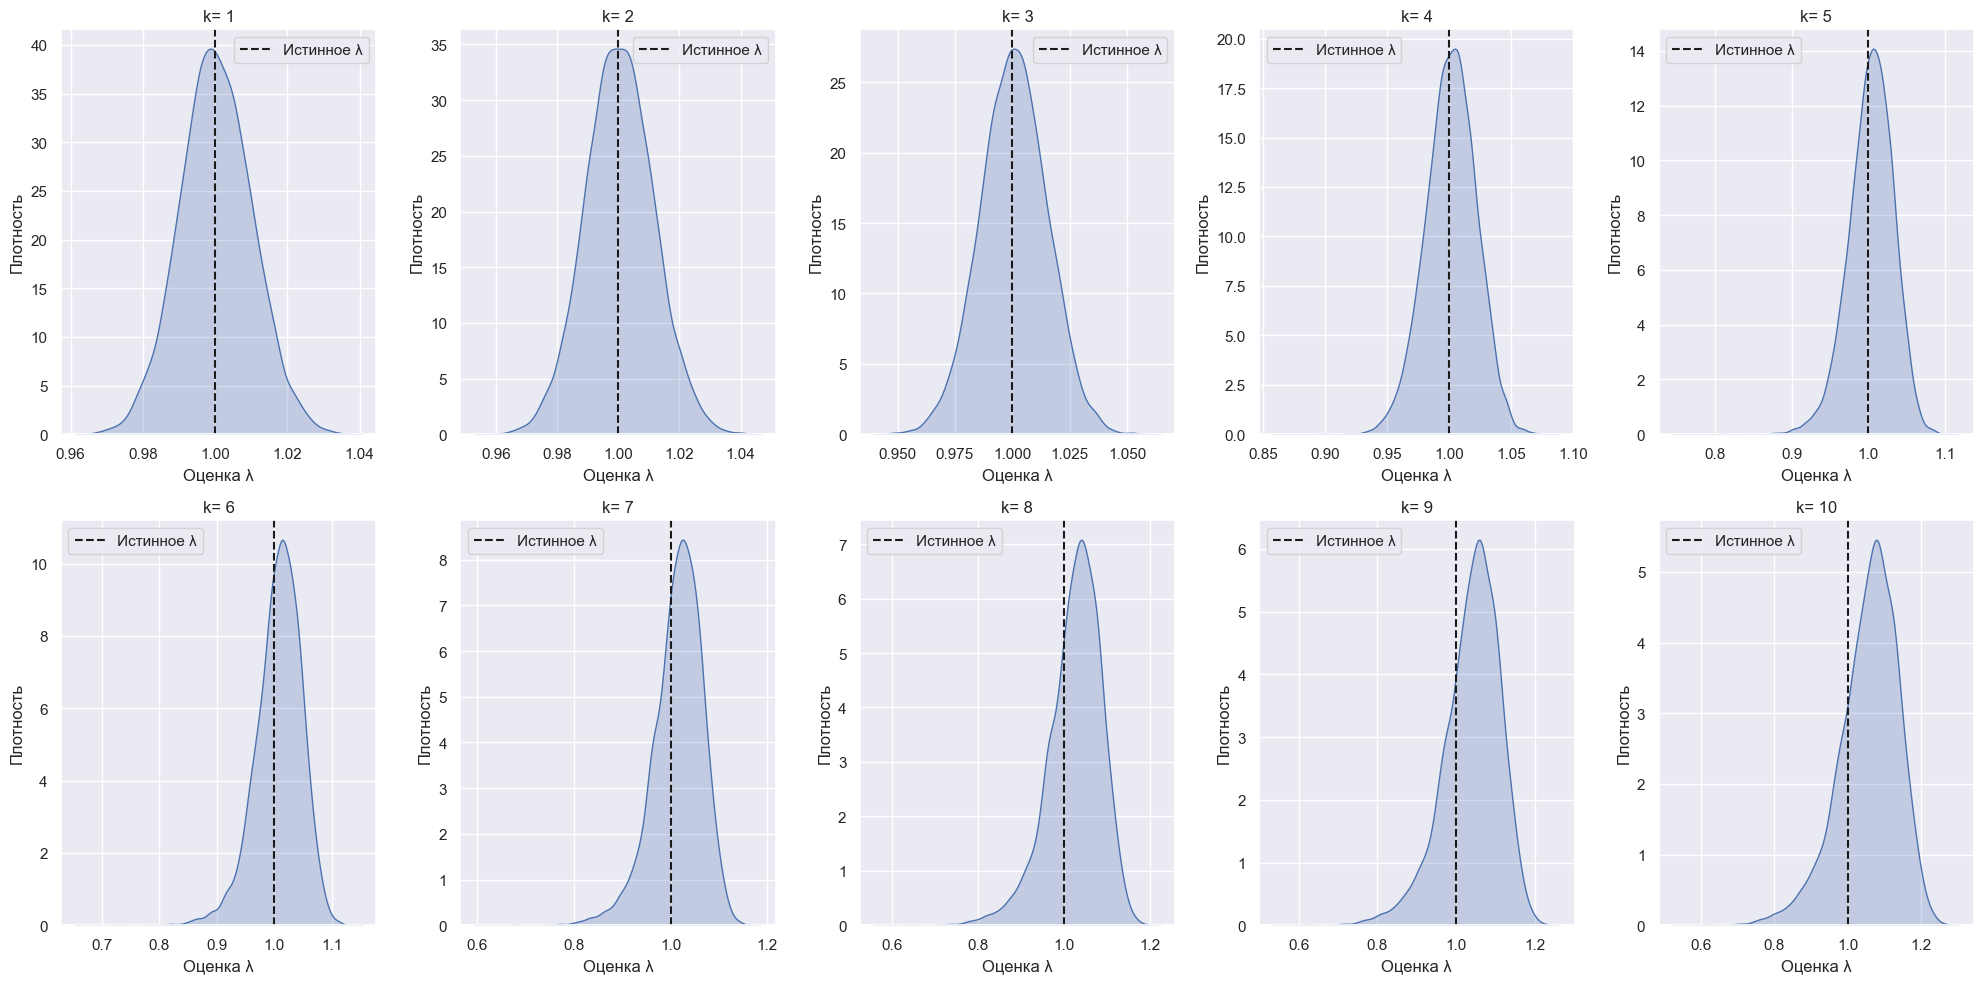

In [237]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

N = 10000
n = 10000  
lambda_param = 1  

samples = np.random.exponential(scale=1/lambda_param, size=(N, n))

for i, (estimator_func, label) in enumerate(lambda_estimators):
    lambda_estimation = estimator_func(samples)
    
    row = i // 5  
    col = i % 5 
    ax = axes[row, col]
    
    sns.kdeplot(lambda_estimation, ax=ax, shade=True)
    
    ax.set_title(label)
    ax.set_xlabel('Оценка  $\lambda$')
    ax.set_ylabel('Плотность')
    ax.axvline(x=1, color='k', linestyle='--', label='Заданное $\lambda$')  # Истинное λ = 1
    ax.legend()

plt.tight_layout()
plt.show()


По графикам видно, что с увеличением k распределение "отодвигается" от заданного значения $\lambda$. Пользуясь логикой прошлого номера (чем ближе к пунктирной линии, тем лучше), можно сделать вывод, что чем меньше k, тем лучше оценка.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

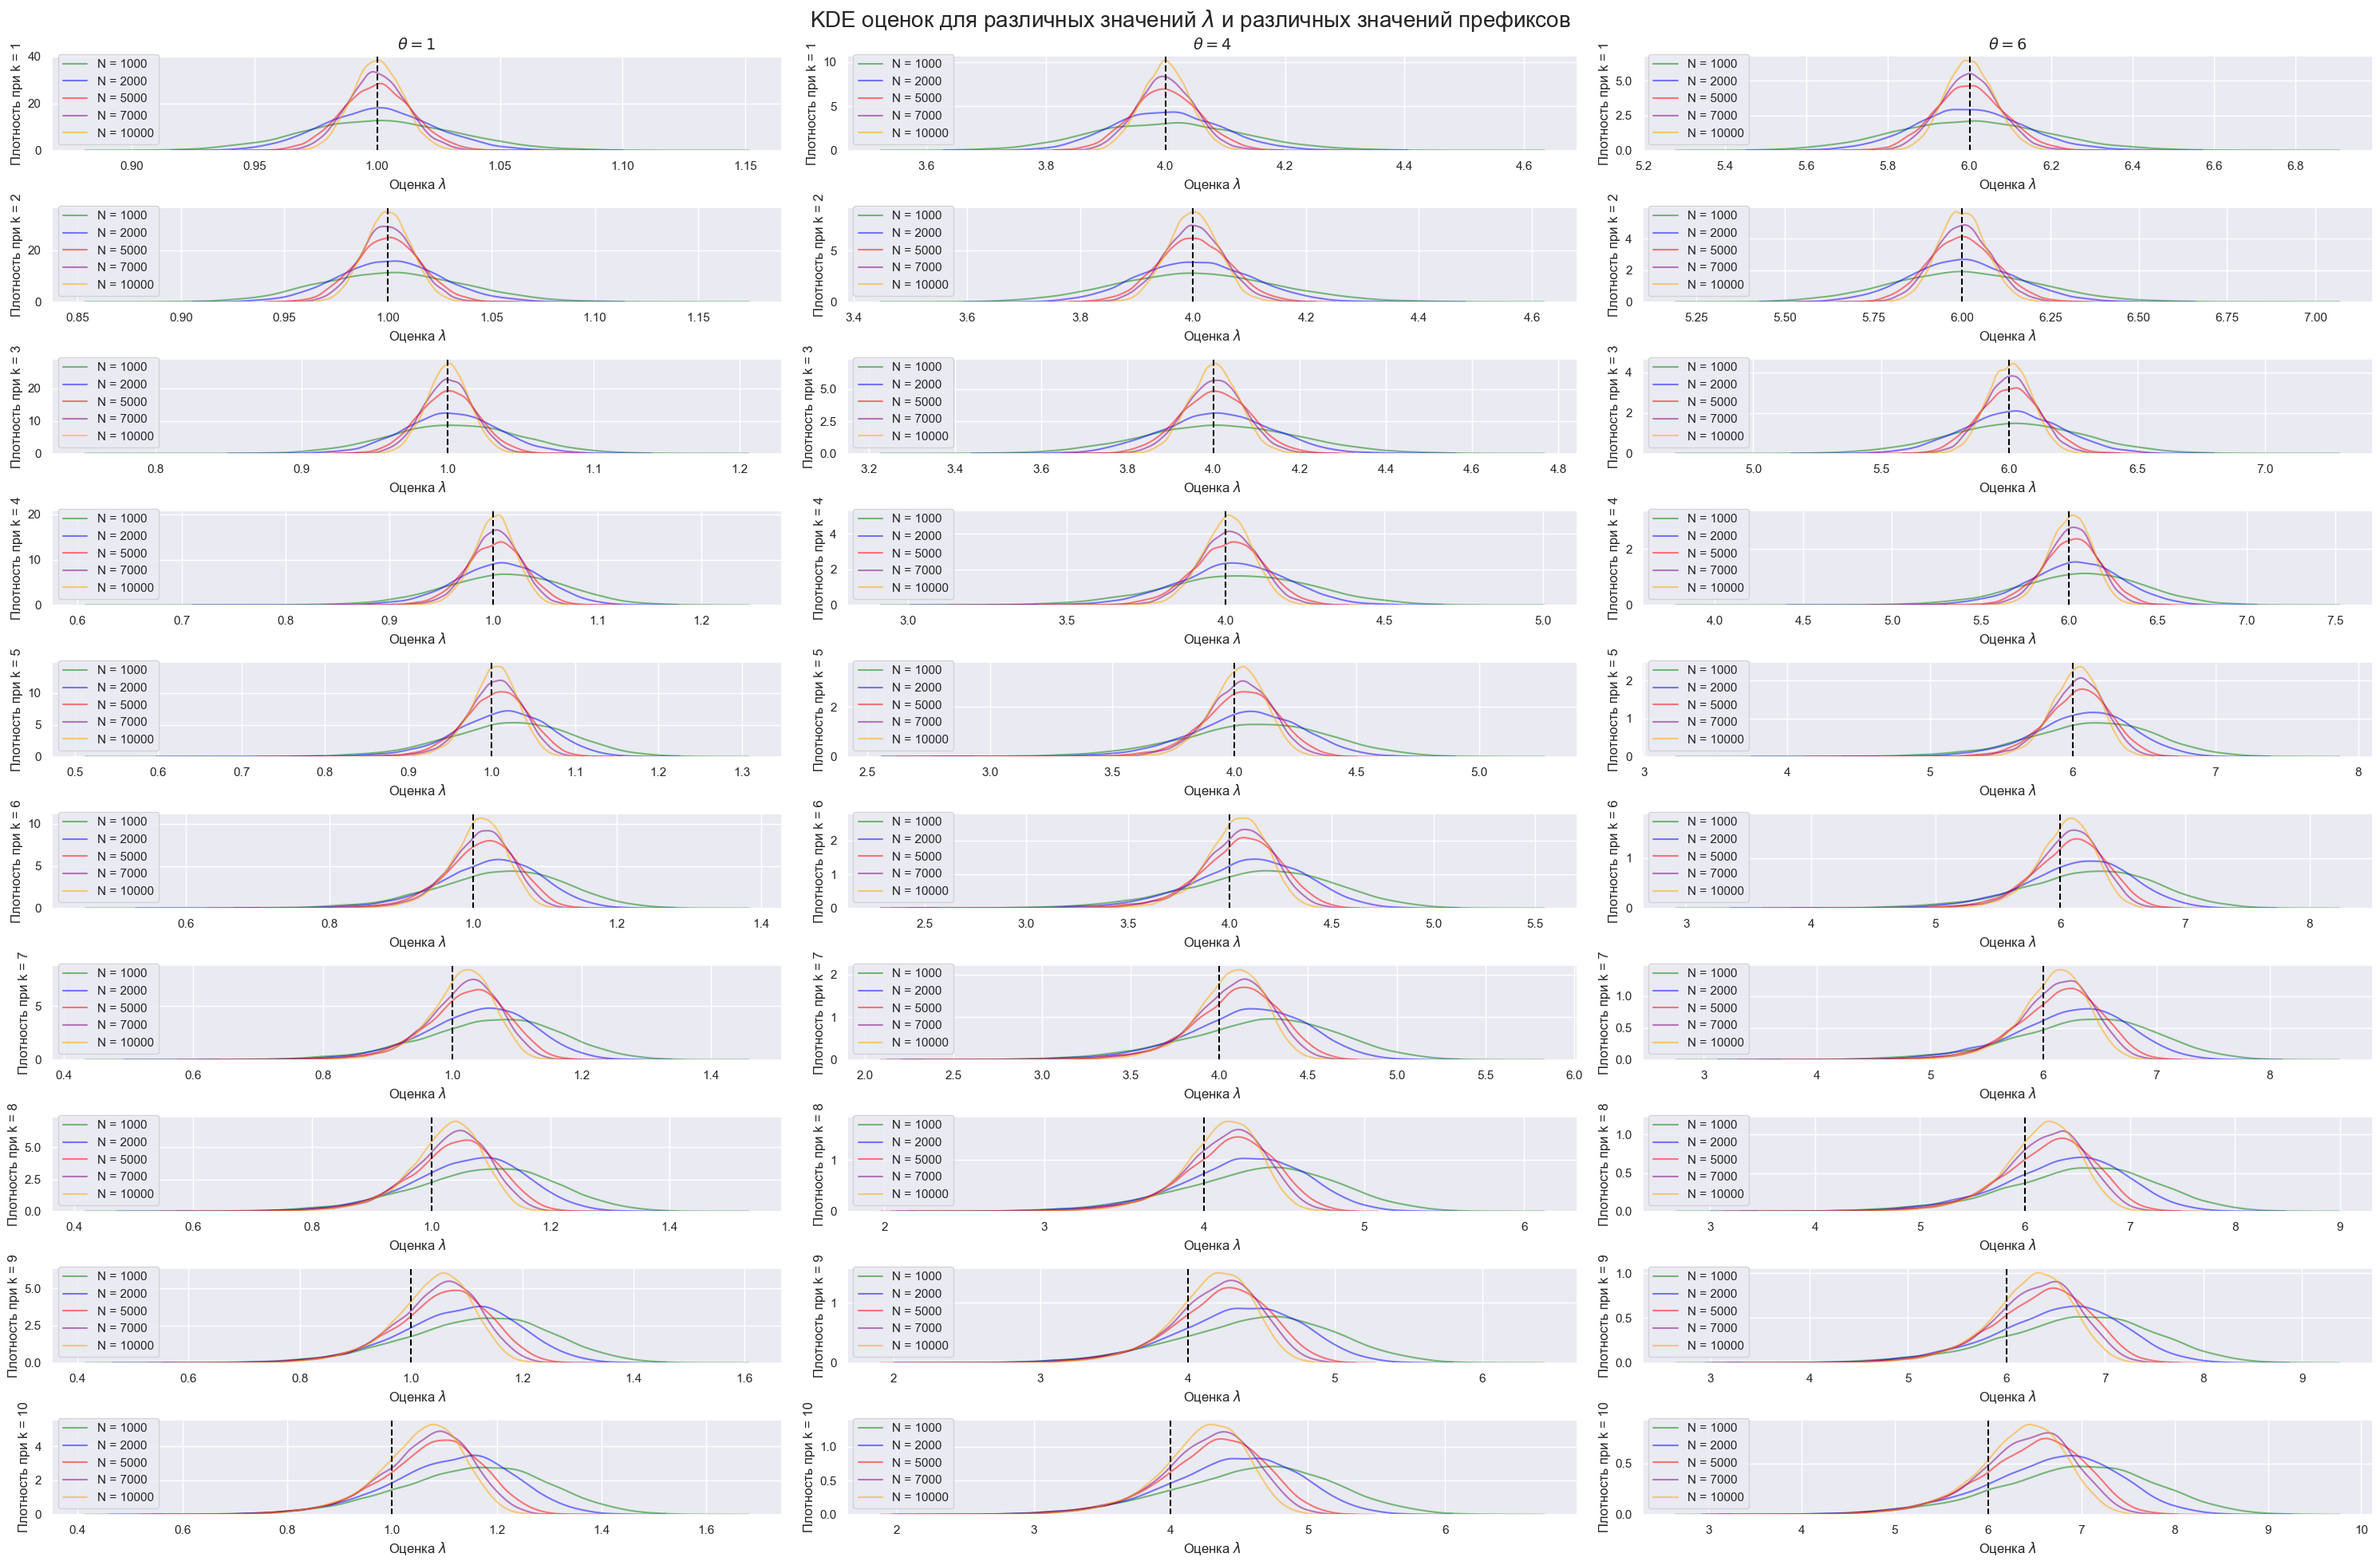

In [235]:
lambda_values = [1, 4, 6]  
prefix_sizes = [1000, 2000, 5000, 7000, 10000]  

N_colors = {1000: 'green', 2000: 'blue', 5000: 'red', 7000: 'purple', 10000: 'orange'}

fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(30, 20))
fig.suptitle('KDE оценок для различных значений $\lambda$ и различных значений префиксов', fontsize=20)


lambda_estimators = []
for i in range(1, 11):
    estimator = lambda X, k=i: (factorial(k) / np.mean(X**k, axis=1)) ** (1 / k)
    label = f'k= {i}'
    lambda_estimators.append((estimator, label))

for col, lambda_true in enumerate(lambda_values):
    samples = np.random.exponential(scale=1/lambda_true, size=(N, n))
    
    for row, (estimator_func, label) in enumerate(lambda_estimators):
        ax = axes[row, col]
        for n in prefix_sizes:
            sample_prefix = samples[:, :n]
            lambda_estimation = estimator_func(sample_prefix)
            sns.kdeplot(lambda_estimation, ax=ax, color=N_colors[n], label=f'N = {n}', alpha=0.5)
        
        ax.axvline(x=lambda_true, color='black', linestyle='--')
        
        if row == 0:
            ax.set_title(f'$\\theta = {lambda_true}$', fontsize=14)
        if col == 0:
            ax.set_ylabel(label, fontsize=12)
        ax.set_xlabel('Оценка $\lambda$')
        ax.set_ylabel(f'Плотность при k = {row + 1}')
        ax.grid(True)
        ax.legend()

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


По графикам видно, что с ростом префикса при любых $\lambda$ линии ближе к заданному $\lambda$, также можно заметить, что чем меньше k, тем лучше оценка (но это было замечено еще в предыдущем пункте).

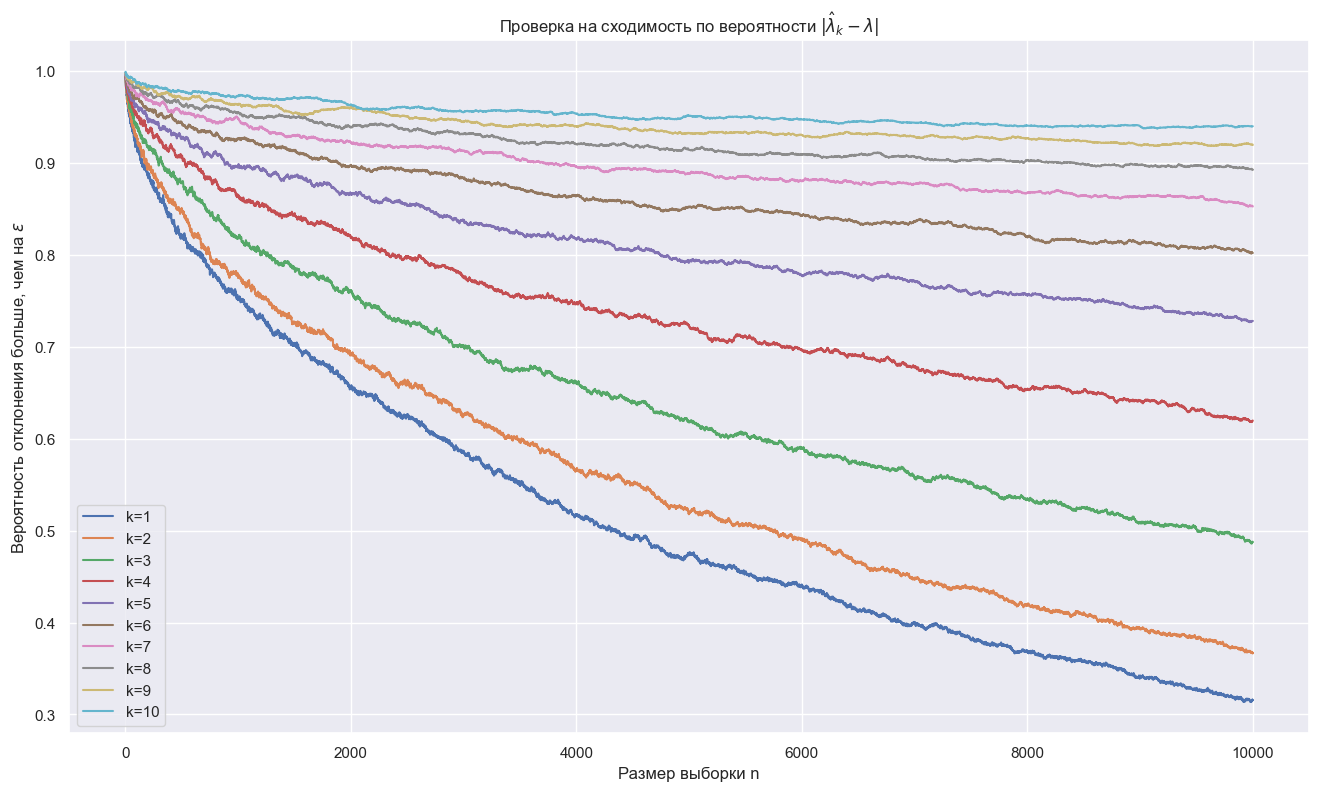

In [238]:
eps = 1e-2
cumm_lambda_estimators = []

for k in range(1, 11): 
    cumm_lambda_estimators.append(((factorial(k) / (np.cumsum(samples **k , axis=1) / np.arange(1, N + 1))) ** (1 / k), f'k = {k}'))
plt.figure(figsize=(16, 9))

for k, (estimator_func, label) in enumerate(cumm_lambda_estimators):
    lambda_estimation = estimator_func
    probability = (np.abs(lambda_estimation - lambda_param) > eps).sum(axis=0) / M
    plt.plot(np.arange(1, N + 1), probability, label=f"k={k+1}")

plt.title(r'Проверка на сходимость по вероятности $|\hat{\lambda}_k - \lambda|$')

plt.xlabel('Размер выборки n')
plt.ylabel('Вероятность отклонения больше, чем на $\epsilon$')
plt.legend()
plt.grid(True)
plt.show()


Чем меньше k, тем быстрее наступает сходимость (требуется меньший размер выборки, чтобы приблизиться к 0). Тем не менее, хотя при больших k не видно продолжений линий на графике, хочется сказать, что они все в какой-то свой момент сойдутся)

Являются ли данные оценки асимптотически нормальными? Проверьте это теоретически и моделированием -- постройте эмпирическую плотность распределения статистик $\sqrt{n}\left(\widehat\lambda_k - \lambda\right)$.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

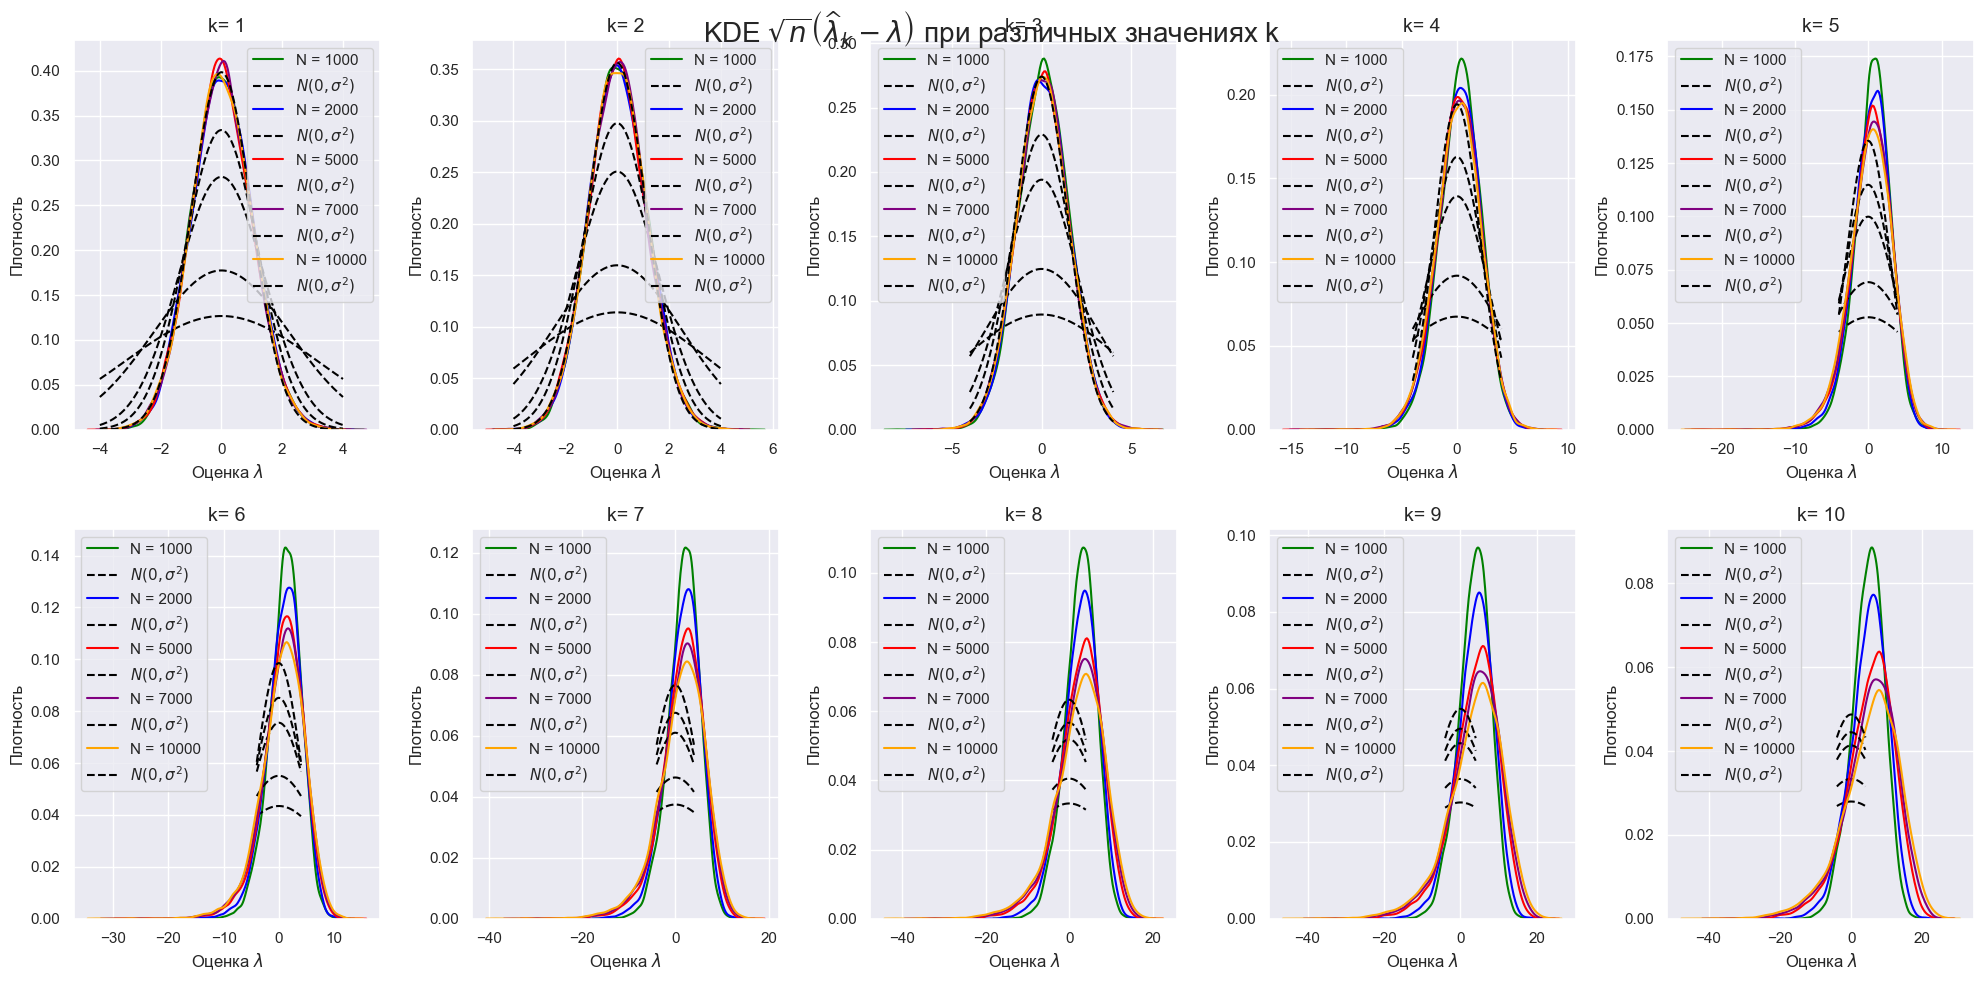

In [244]:
lambda_true = 1
N = 10000  
prefix_sizes = [1000, 2000, 5000, 7000, 10000]  

N_colors = {1000: 'green', 2000: 'blue', 5000: 'red', 7000: 'purple', 10000: 'orange'}


fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
fig.suptitle(r'KDE $\sqrt{n}\left(\widehat\lambda_k - \lambda\right)$ при различных значениях k', fontsize=20)

lambda_estimators = []
for i in range(1, 11):
    estimator = lambda X, k=i: (factorial(k) / np.mean(X**k, axis=1)) ** (1 / k)
    label = f'k= {i}'
    lambda_estimators.append((estimator, label))

for idx, (estimator_func, label) in enumerate(lambda_estimators):
    row = idx // 5  
    col = idx % 5   
    ax = axes[row, col]
    scaled_estimations = []
    
    for n in prefix_sizes:
        sample_prefix = samples[:, :n]
        lambda_estimation = estimator_func(sample_prefix)
        scaled_estimation = (lambda_estimation - lambda_true) * np.sqrt(n)
        scaled_estimations.append(scaled_estimation)
        
        sns.kdeplot(scaled_estimation, ax=ax, color=N_colors[n], label=f'N = {n}')
    
    grid = np.linspace(-4, 4, 10000)  
    std = np.std(np.sqrt(10000) * (lambda_estimation - lambda_true))  
    normal_pdf = sps.norm.pdf(grid, loc=0, scale=std)  

    ax.plot(grid, normal_pdf, color= 'black', linestyle='dashed', label="$N(0, \\sigma^2)$")
        
    ax.set_title(f'{label}', fontsize=14)
    if col == 0:
        ax.set_ylabel(label, fontsize=12)

    ax.set_xlabel('Оценка $\lambda$')
    ax.set_ylabel('Плотность')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


Черным пунктиром изображено KDE нормального распределения. По графикам видно, чем меньше k, тем ближе KDE к нормальному распределению, и чем больше размер префикса, тем (аналогично) ближе к нормальному распределению. Чем меньше k - тем более распределение похоже на нормальное.

Посчитайте дисперсию оценок для разных $k$ и разных размеров выборки. Сходится ли она к теоретической? Что Вы можете сказать о скорости сходимости?

На одном графике изобразите плотности распределений оценок для разных $k$ и на основе графика сделайте выбор параметра. Обоснуйте его.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

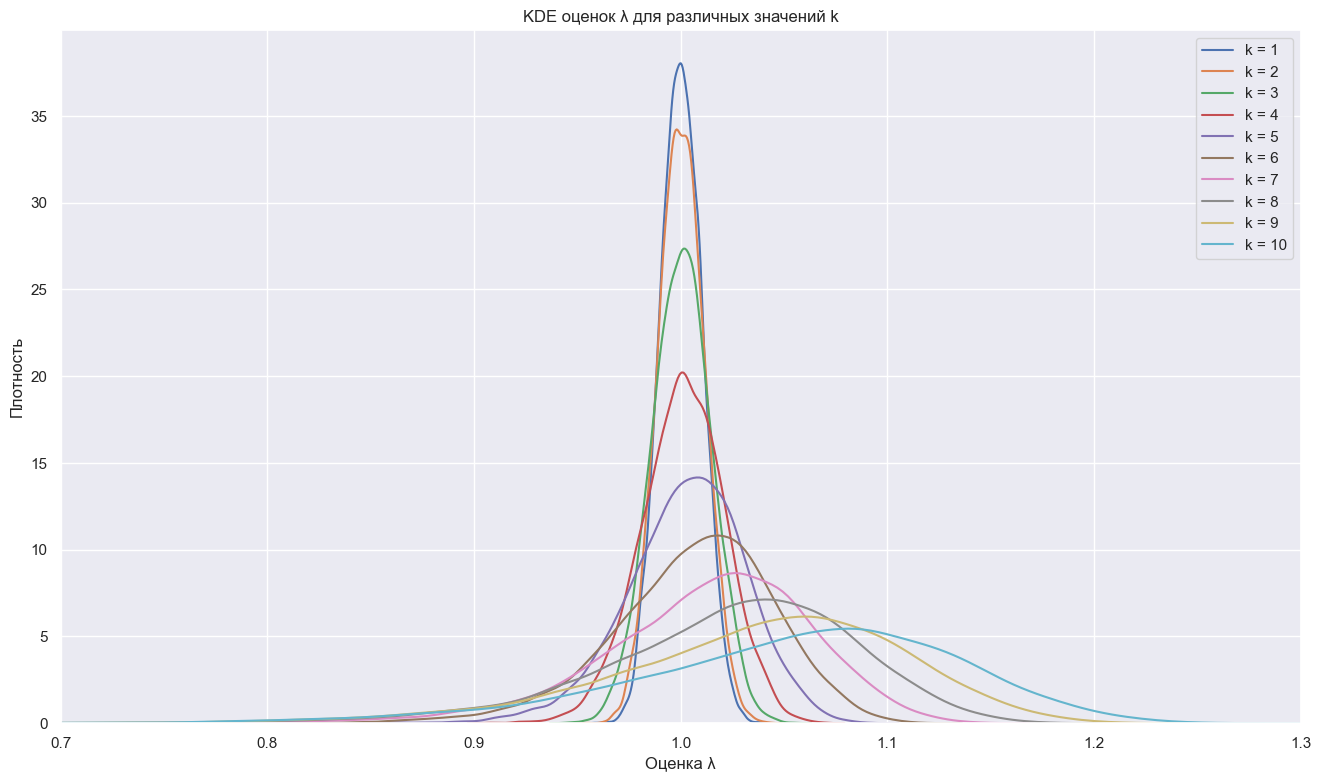

In [213]:
lambda_estimators = []
for i in range(1, 11):
    estimator = lambda X, k=i: (factorial(k) / np.mean(X**k, axis=1)) ** (1 / k)
    label = f'k = {i}'
    lambda_estimators.append((estimator, label))

plt.figure(figsize=(16, 9))
for (estimator_func, label) in lambda_estimators:
    lambda_estimation = estimator_func(samples)
    sns.kdeplot(lambda_estimation, label=label)
    
plt.title('KDE оценок λ для различных значений k')
plt.xlim(0.7, 1.3)
plt.xlabel('Оценка λ')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()



Чем дальше от 1, тем оценка хуже, поэтому хлчется сказать, что самое лучшее значения k равно 1.

Для одной выборки постройте графики $\left|\hat{\lambda}_k - \lambda\right|$ и сравните скорости сходимости к нулю при увеличении размера выборки.

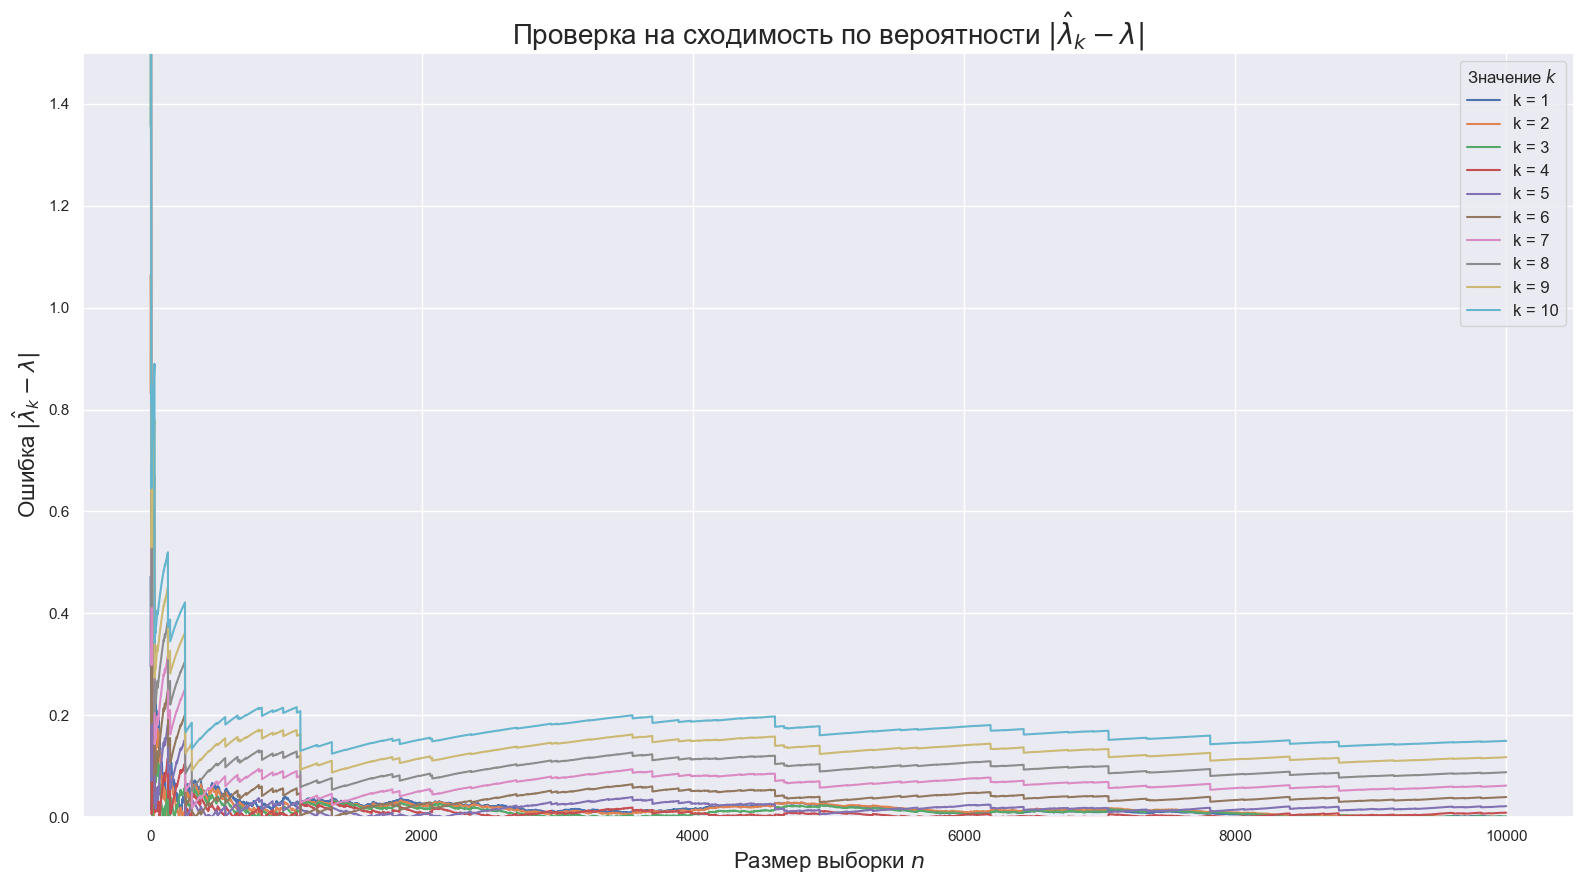

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

lambda_true = 1      
n = 10000             

samples = np.random.exponential(scale=1/lambda_true, size=(1, n))

cumm_lambda_estimators = []
for k in range(1, 11):
    mean_Xk = np.cumsum(samples ** k, axis=1) / np.arange(1, n + 1)  
    lambda_estimation = (factorial(k) / mean_Xk) ** (1 / k)       
    
    label = f'k = {k}'
    cumm_lambda_estimators.append((lambda_estimation, label))

plt.figure(figsize=(16, 9))

for idx, (lambda_estimation, label) in enumerate(cumm_lambda_estimators):
    estimates = lambda_estimation[0]
    abs_error = np.abs(estimates - lambda_true)
    plt.plot(np.arange(1, n +1), abs_error, label=label)

plt.ylim(0,1.5)
plt.title(r'Проверка на сходимость по вероятности $|\hat{\lambda}_k - \lambda|$', fontsize=20)
plt.xlabel('Размер выборки $n$', fontsize=16)
plt.ylabel(r'Ошибка $|\hat{\lambda}_k - \lambda|$', fontsize=16)
plt.legend(title='Значение $k$', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Сделайте вывод.

Оценки все несмещенные, поэтому логично, что они сходятся к 0. Но тут сложно отметить очевидную сходимость (из-за того, что линии идут очень волнообразно). Хочется сказать, что с увеличением выборки эти "волны" будут сходиться к 0 более очевидно.


__Вывод:__ Я исследовала поведение оценок при разных значениях k. Разными путями я увидела, что лушее значение k - это k=1.

### Задача 3

Кианские провинции до сих пор надеются отделиться от Новой Империи, и поэтому планируют саботировать Ордалию. К их счастью, число урожая в пустынных землях на юге подчиняется распределению Коши, которое отличается существенно от двух распределений из задач 1 и 2. Чем отличается? Как это повлияет на оценивание его параметра сдвига?

В этой задаче Вам нужно показать на примере, как построение интуитивно понятной оценки без теоретического обоснования может дать неадекватный результат.

Ниже напишите, какое поведение Вы ожидаете от оценки среднего и медианы. Обоснуйте ожидания, ссылаясь на теоремы и задачи из курса теории вероятностей:

Ответ:

Для распределения Коши моделированием изучите поведение оценки параметра сдвига при помощи среднего и медианы. У какой из этих оценок лучше асимптотические свойства?

Проверьте свои теоретические ожидания, написанные в начале задачи. Моделированием проверьте, какие оценки состоятельны и асимптотически нормальны.

Изучите поведение эмпирической дисперсии оценок среднего и медианы. Какая из них сходится? С какой скоростью? Для проверки постройте график какой-то детерминированной функции с такой же скоростью сходимости.

**Вывод:**

### Задача 4

Древние свитки из Сареотской библиотеки хранят знания двух древних волшебников севера --- Гливенко и Кантелли. Два мага-гностика придумали ультимативный способ оценивания распределений количества чего угодно. Их способом пользовались короли севера ещё две тысячи лет назад, во времена Первой Ордалии. Аспект-Император отдал приказ проверить, верны ли их выкладки до сих пор.

Эта задача посвящена проверке теоремы Гливенко-Кантелли, как основного теоретического результата курса. Условия посмотрите в методичке или сходите на лекцию старшего магистра колдовства и чародейства Савёлова М.П.

Сгенерируйте $N$ выборок $X_1,\dots, X_N$ размера $N$ из стандартного нормального распределения для $N = 10^4$.

In [13]:
np.random.seed(42)

Для всех $n \leqslant N$ первой выборки посчитайте эмпирическую функцию распределения.


In [14]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary

ecdfs: typing.List[ECDF] = [ECDF(X.sample[:i]) for i in range(1, len(X) + 1)]

AttributeError: 'numpy.ndarray' object has no attribute 'sample'

Для некоторых $n$ (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`) и сравните каждый из них с истинной функцией распределения (количество графиков равно количеству различных значений $n$).

Проверьте выполнение теоремы Гливенко-Кантелли.

Для всех $n ≤ N$ посчитайте значение $D_n = \displaystyle{\sup_{x \in \mathbb R}} | \hat{F}_n(x) - F(x)|$ для первой выборки. Промоделируйте поведение статистики $\sqrt{n}D_n$. Наблюдается ли сходимость их распределений на графиках?


Пища для ума: если Ваша эмпирическая плотность сходится к чему-то, то это не просто так! Поищите на просторах интернета, учебников и бесед с умными людьми, куда должна сходиться статистика $\sqrt{n}D_n$. Подумайте, для чего может быть полезен этот теоретический результат.

Ответ:

Сделайте вывод о важности теоремы Гливенко-Кантелли в численном анализе. Какие методы, применяемые Вами в других задачах неявно основываются на этой теореме?

**Вывод:**

### Задача 5

Оказывается, нельзя оценивать распределения оценок на глаз простым всматриванием в графики! Поэтому гностики из крепости Нрон изобрели новое заклинание -- QQ-plot. В этой задаче Вам предстоит научиться проверять распределения на принадлежность семействам при помощи этого инструмента.

В этой задаче Вам предлагается изучить инструмент QQ-plot и сделать на его основе выводы о равенстве распределений.

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $\mathrm U{[0, \theta]}$ для $\theta=1$ размера $n=40$. Моделированием статистик $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$ изучите их распределение. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

Указание: можно взять код и результаты из задачи 1. Просто скопируйте их сюда.

In [ ]:
N_samples = 400
n = 40

bins = [i / 40 + 0.8 for i in range(18)]

Промоделируйте статистики $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$. К чему сходятся их распределения с ростом $n$?

На какие распределения похожи получившиеся гистограммы?

**Ответ:**

Вспомните, чему равен коэффициент $\sigma^2(\theta)$ для асимптотически нормальной оценки $\hat\theta = 2\overline{X}$ параметра $\theta$ равномерного распределения в формуле
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma^2(\theta)}} \xrightarrow{d} \mathcal N(0, 1).
$$

**Ответ**:

Посчитайте статистику
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma^2(\theta)}}$$ для каждой выборки. Постройте её плотность теоретически и при помощи KDE.

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению, часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Изучите семинарский ноутбук ноль и постройте QQ-plot предложенной статистики и нормального распределения.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:**

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:**

Бонусная часть (+5 баллов): Если Вы нашли семейство распределений, которое по QQ-plot соответствует выборке, то докажите строго, что $n(\theta^* - \theta)$ сходится к нему. Заметьте, что это утверждение от асимптотической нормальности отличается только заменой $\sqrt{n}$ на $n$. Такие оценки называются **сверхнормальными**. В конце доказательства поясните:

- как множитель, зависящий от $n$, связан с скоростью сходимости оценки на практике?
- лучше ли сверхномальная оценка, чем нормальная оценка?

**Решение:**

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:**

Не забудьте перезапустить с нуля весь ноутбук перед отправкой! Удачи.